<a href="https://colab.research.google.com/github/Suratan63011017/Diamonds-Project/blob/main/Diamonds_Sourcecode.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [48]:
pip install -U stemgraphic  

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [49]:
import numpy as np
import math
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import stemgraphic
import scipy.stats as stats

%matplotlib inline
sns.set()

In [50]:
url = "https://raw.githubusercontent.com/Suratan63011017/Diamonds-Project/main/diamonds.csv"
diamonds_data = pd.read_csv(url)
diamonds_data = diamonds_data.iloc[:, 1:]
diamonds_data_old = diamonds_data
# mild outlier
# diamonds_data = diamonds_data[diamonds_data['carat'] <= 2.025]
# diamonds_data = diamonds_data[diamonds_data['depth'] <= 64.75]
# diamonds_data = diamonds_data[diamonds_data['depth'] >= 58.75]
# diamonds_data = diamonds_data[diamonds_data['table'] <= 63.5]
# diamonds_data = diamonds_data[diamonds_data['table'] >= 51.5]
# diamonds_data = diamonds_data[diamonds_data['price'] <= 12147]

# extreme outlier
diamonds_data = diamonds_data[diamonds_data['carat'] <= 3]
diamonds_data = diamonds_data[diamonds_data['depth'] <= 67.00]
diamonds_data = diamonds_data[diamonds_data['depth'] >= 56.50]
diamonds_data = diamonds_data[diamonds_data['table'] <= 68.00]
diamonds_data = diamonds_data[diamonds_data['table'] >= 47.00]
diamonds_data = diamonds_data[diamonds_data['price'] <= 18870.00]
diamonds_data

,carat,cut,color,clarity,depth,table,price,x,y,z,price/carat
0,0.63,Ideal,D,IF,61.2,53.0,3832,5.55,5.60,3.41,6082.539683
1,0.65,Ideal,D,VVS1,61.8,57.0,4022,5.54,5.56,3.43,6187.692308
2,0.91,Premium,E,VVS2,61.1,61.0,7006,6.24,6.20,3.80,7698.901099
3,0.55,Very Good,F,VS1,60.7,60.0,1853,5.29,5.32,3.22,3369.090909
4,0.71,Very Good,G,VS2,63.1,56.0,2462,5.58,5.77,3.58,3467.605634
...,...,...,...,...,...,...,...,...,...,...,...
4995,0.50,Ideal,I,VVS2,61.8,57.0,1322,5.09,5.11,3.15,2644.000000
4996,0.34,Ideal,F,VVS1,61.1,56.0,1174,4.50,4.53,2.76,3452.941176
4997,0.57,Ideal,G,SI1,61.7,56.0,1364,5.33,5.37,3.30,2392.982456
4998,1.11,Premium,E,SI2,61.6,61.0,4177,6.66,6.61,4.09,3763.063063


In [51]:
# check = diamonds_data
# for i in check['color']:
#   # print(i)
#   if (i == 'J'):
#     continue
#   else:
#     indexNames = check[ (check['color'] == i) ].index
#     check.drop(indexNames , inplace=True)

# check
# check['price'].mean()


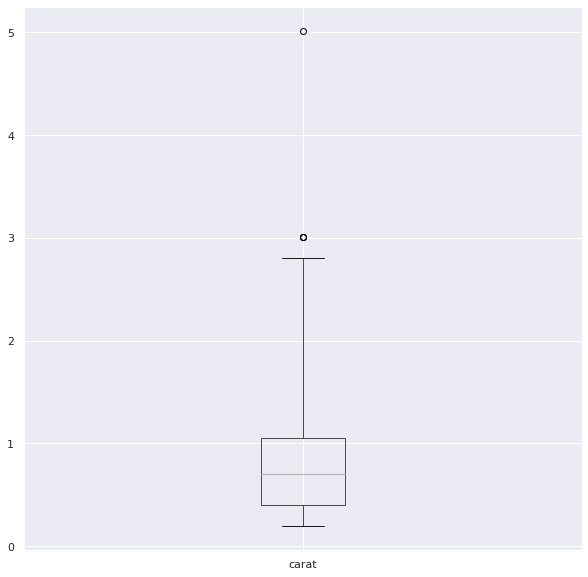

In [52]:
boxplot = diamonds_data_old.boxplot(figsize = (10,10),column=["carat"],whis = 3.0)

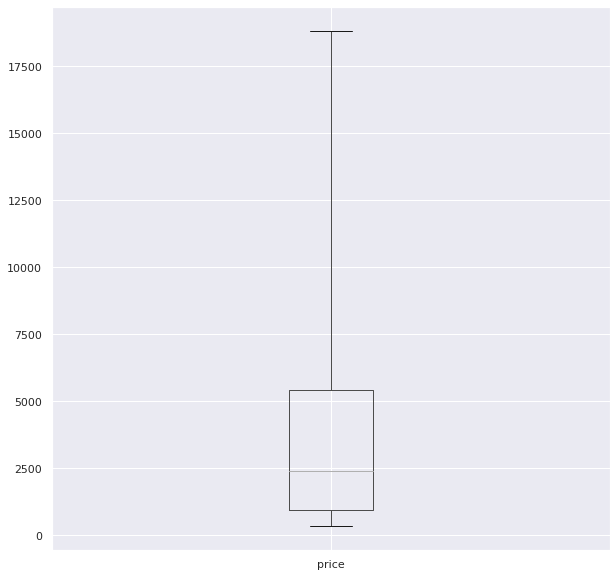

In [53]:
boxplot = diamonds_data_old.boxplot(figsize = (10,10),column=["price"],whis = 3.0)

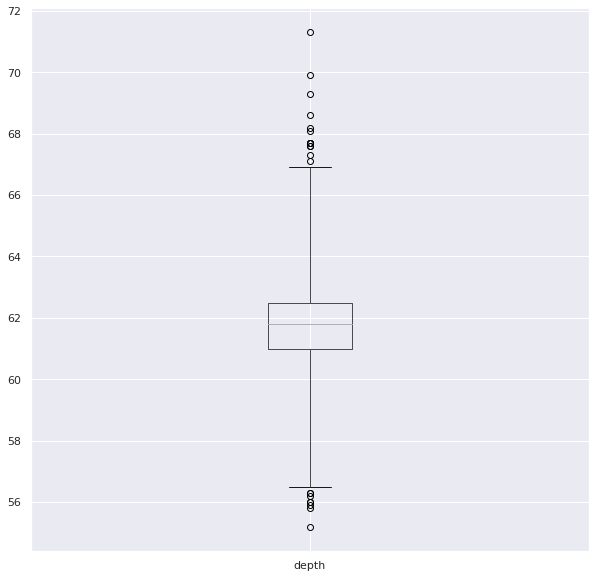

In [54]:
boxplot = diamonds_data_old.boxplot(figsize = (10,10),column=["depth"],whis = 3.0)

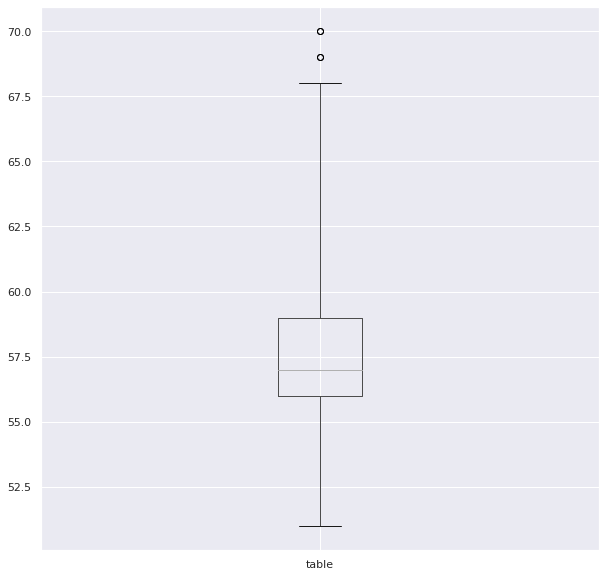

In [55]:
boxplot = diamonds_data_old.boxplot(figsize = (10,10),column=["table"],whis = 3.0)

In [56]:
diamonds_data = diamonds_data.drop(diamonds_data[diamonds_data["x"]==0].index)
diamonds_data = diamonds_data.drop(diamonds_data[diamonds_data["y"]==0].index)
diamonds_data = diamonds_data.drop(diamonds_data[diamonds_data["z"]==0].index)
diamonds_data.shape

(4969, 11)

In [57]:
diamonds_data.describe().T

,count,mean,std,min,25%,50%,75%,max
carat,4969.0,0.797879,0.473717,0.200000,0.40,0.70,1.05000,2.68
depth,4969.0,61.709801,1.323561,56.500000,61.00,61.80,62.50000,66.90
table,4969.0,57.434755,2.195993,51.000000,56.00,57.00,59.00000,68.00
price,4969.0,3969.970215,4059.823618,353.000000,939.00,2383.00,5413.00000,18803.00
x,4969.0,5.734305,1.121730,3.820000,4.72,5.70,6.55000,9.11
y,4969.0,5.736526,1.114131,3.780000,4.72,5.71,6.56000,9.07
z,4969.0,3.539141,0.692005,2.300000,2.91,3.52,4.04000,5.55
price/carat,4969.0,4022.779037,2036.764277,1138.888889,2455.00,3484.00,4957.54717,15928.00


In [58]:
diamonds_data.median()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning:

Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.



carat             0.70
depth            61.80
table            57.00
price          2383.00
x                 5.70
y                 5.71
z                 3.52
price/carat    3484.00
dtype: float64

In [59]:
diamonds_data.mode()

,carat,cut,color,clarity,depth,table,price,x,y,z,price/carat
0,0.3,Ideal,G,SI1,62.1,56.0,605.0,4.42,4.37,2.68,2250.0
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.69,NaN


In [60]:
diamonds_data.var()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning:

Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.



carat          2.244079e-01
depth          1.751814e+00
table          4.822385e+00
price          1.648217e+07
x              1.258278e+00
y              1.241287e+00
z              4.788710e-01
price/carat    4.148409e+06
dtype: float64

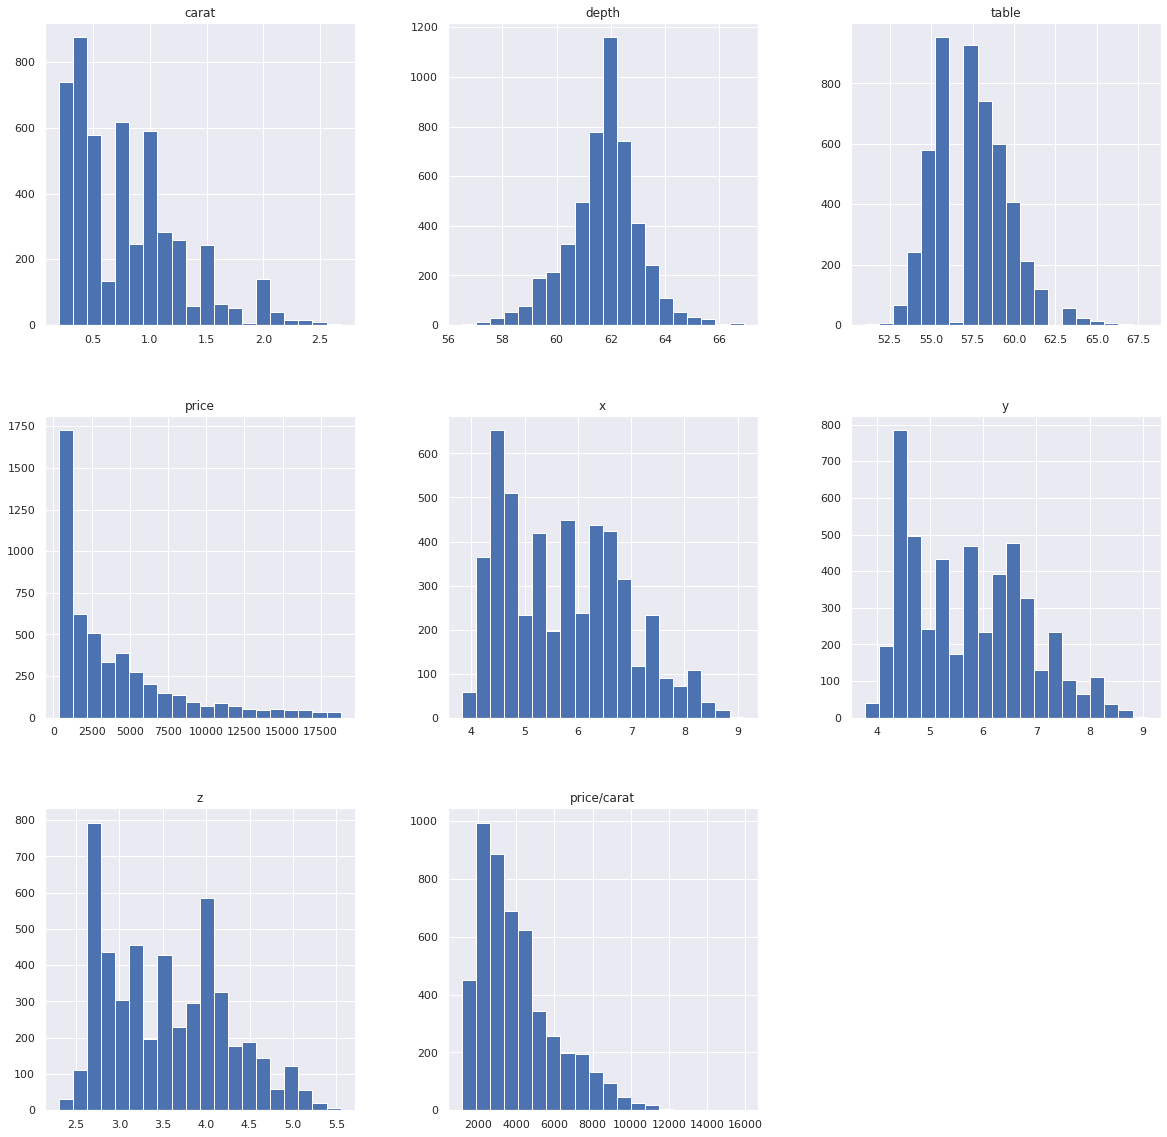

In [61]:
p = diamonds_data.hist(figsize = (20,20),bins = 20)

In [62]:
cont=[ "carat","depth","table",'x', 'y','z','price']
cat=['cut','color', 'clarity']

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



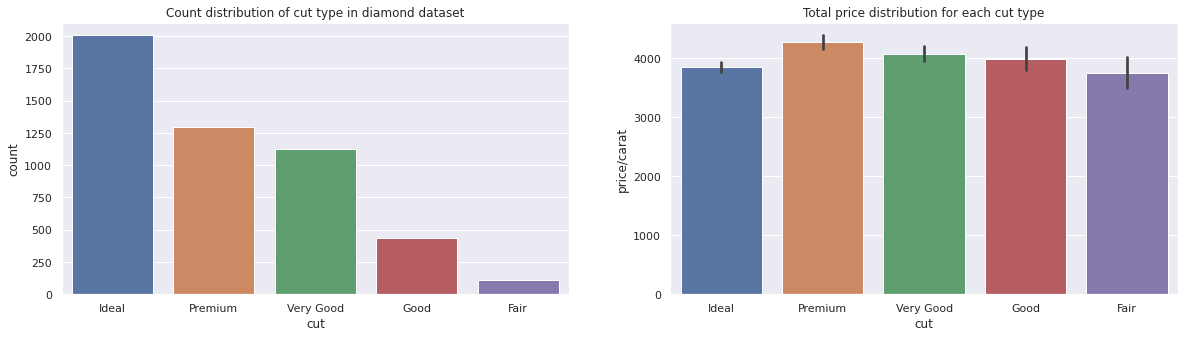

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



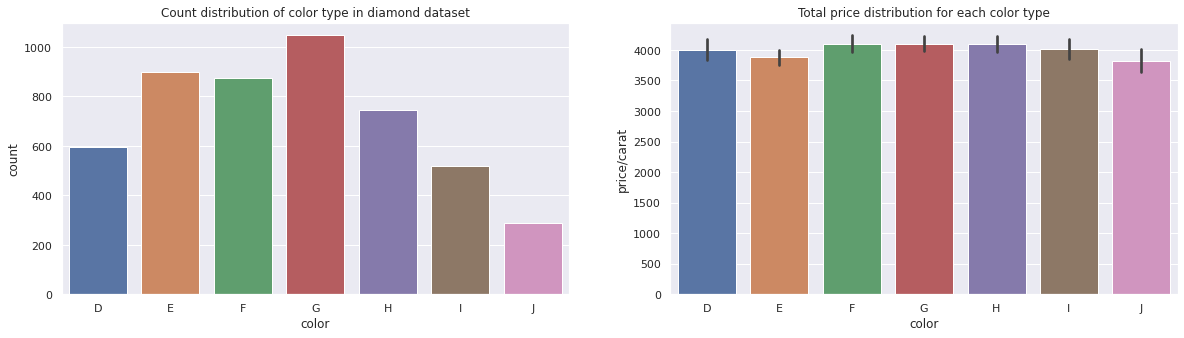

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



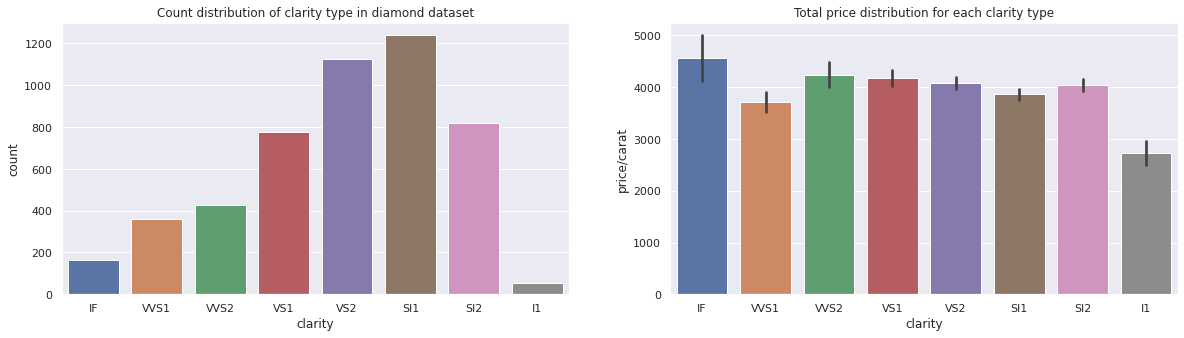

In [63]:
def plot1(i):
    plt.figure(figsize=(20,5))
    ax1=plt.subplot(121)
    sns.countplot(diamonds_data[i],ax=ax1)
    plt.title("Count distribution of {} type in diamond dataset".format(i))
    
    ax2=plt.subplot(122)
    sns.barplot(x=diamonds_data[i],y=diamonds_data["price/carat"],ax=ax2)
    plt.title("Total price distribution for each {} type".format(i))
    plt.show()
    
for i in cat:
    plot1(i)

(<Figure size 540x486 with 1 Axes>,
 <matplotlib.axes._axes.Axes at 0x7fb784126750>)

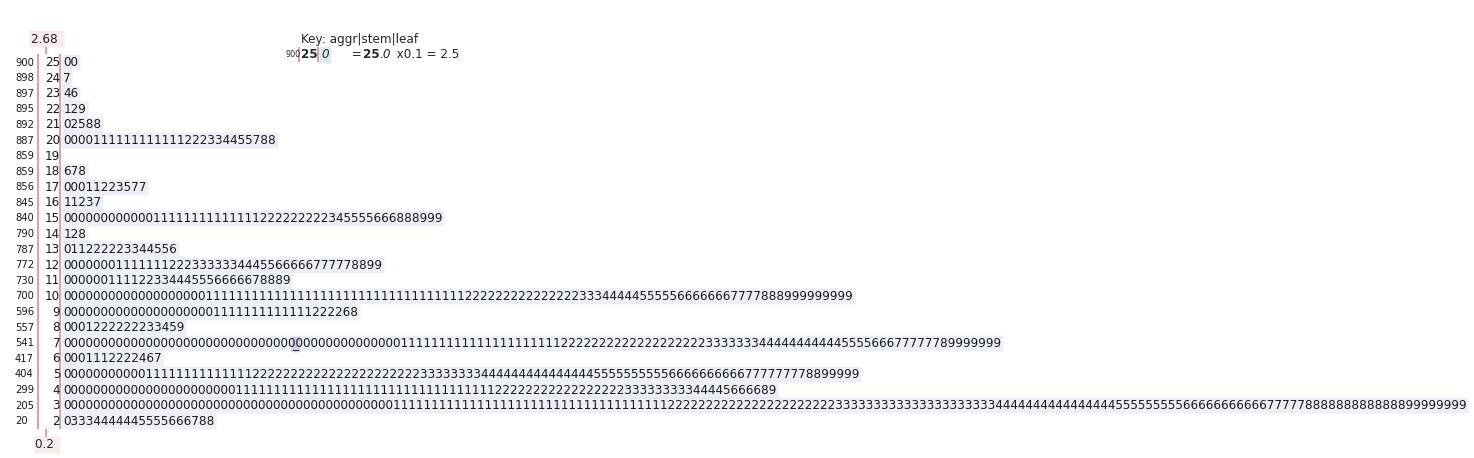

In [64]:
stemgraphic.stem_graphic(diamonds_data.carat ,scale = 0.1)

(<Figure size 540x396 with 1 Axes>,
 <matplotlib.axes._axes.Axes at 0x7fb784690250>)

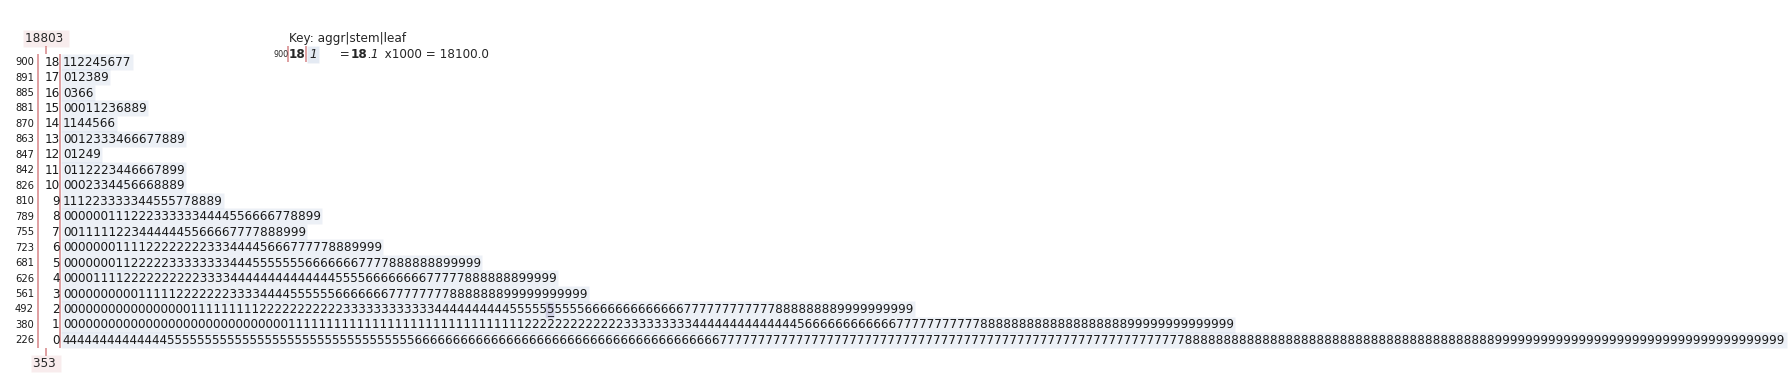

In [65]:
stemgraphic.stem_graphic(diamonds_data.price, scale = 1000)

(<Figure size 540x252 with 1 Axes>,
 <matplotlib.axes._axes.Axes at 0x7fb782401050>)

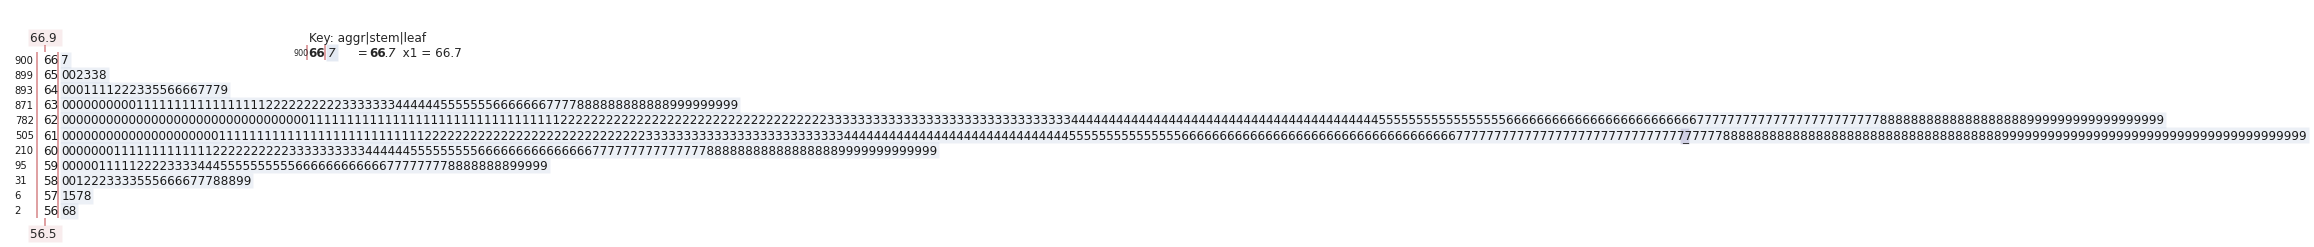

In [66]:
stemgraphic.stem_graphic(diamonds_data.depth, scale = 1)

(<Figure size 540x378 with 1 Axes>,
 <matplotlib.axes._axes.Axes at 0x7fb78461b490>)

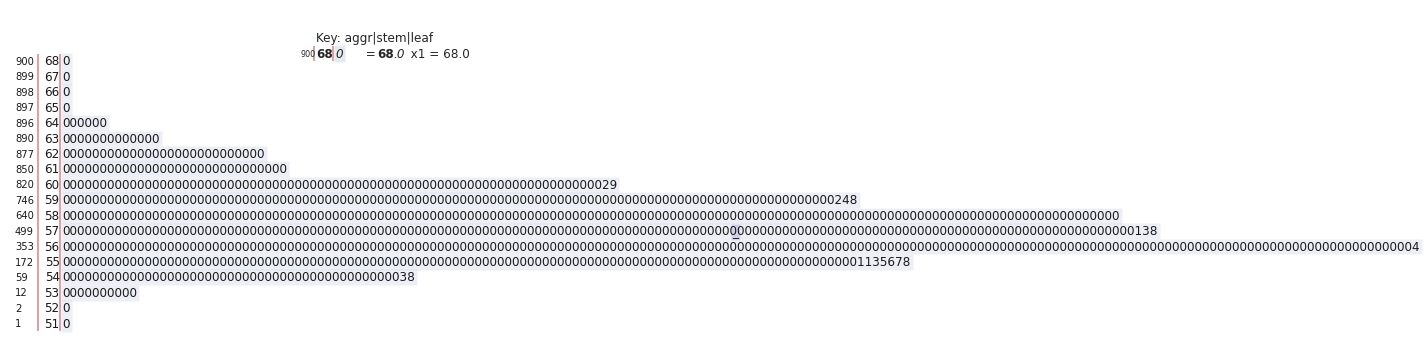

In [67]:
stemgraphic.stem_graphic(diamonds_data.table, scale = 1)

In [68]:
D = diamonds_data.loc[diamonds_data['color']=='D'].assign(Location=7)
E = diamonds_data.loc[diamonds_data['color']=='E'].assign(Location=6)
F = diamonds_data.loc[diamonds_data['color']=='F'].assign(Location=5)
G = diamonds_data.loc[diamonds_data['color']=='G'].assign(Location=4)
H = diamonds_data.loc[diamonds_data['color']=='H'].assign(Location=3)
I = diamonds_data.loc[diamonds_data['color']=='I'].assign(Location=2)
J = diamonds_data.loc[diamonds_data['color']=='J'].assign(Location=1)

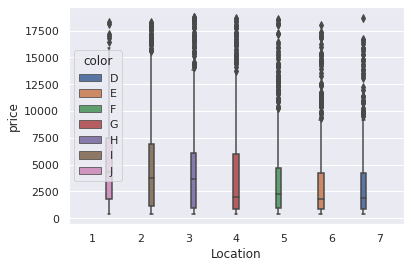

In [69]:
cdf = pd.concat([D,E,F,G,H,I,J])
cdf = cdf.drop(["cut","carat","clarity","depth","table","x","y","z"], axis = 1)
df = sns.boxplot(x = "Location",y="price",hue = "color", data = cdf)

In [70]:
I1 = diamonds_data.loc[diamonds_data['clarity']=='I1'].assign(Location=1)
SI2 = diamonds_data.loc[diamonds_data['clarity']=='SI2'].assign(Location=2)
SI1 = diamonds_data.loc[diamonds_data['clarity']=='SI1'].assign(Location=3)
VS2 = diamonds_data.loc[diamonds_data['clarity']=='VS2'].assign(Location=4)
VS1 = diamonds_data.loc[diamonds_data['clarity']=='VS1'].assign(Location=5)
VVS2 = diamonds_data.loc[diamonds_data['clarity']=='VVS2'].assign(Location=6)
VVS1 = diamonds_data.loc[diamonds_data['clarity']=='VVS1'].assign(Location=7)
IF = diamonds_data.loc[diamonds_data['clarity']=='IF'].assign(Location=8)

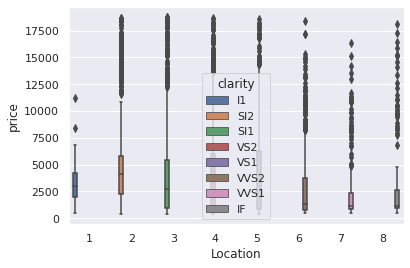

In [71]:
cdf = pd.concat([I1,SI2,SI1,VS2,VS1,VVS2,VVS1,IF])
cdf = cdf.drop(["cut","carat","color","depth","table","x","y","z"], axis = 1)
df = sns.boxplot(x = "Location",y="price",hue = "clarity", data = cdf)

In [72]:
fair = diamonds_data.loc[diamonds_data['cut']=='Fair'].assign(Location=1)
good = diamonds_data.loc[diamonds_data['cut']=='Good'].assign(Location=2)
verygood = diamonds_data.loc[diamonds_data['cut']=='Very Good'].assign(Location=3)
premium = diamonds_data.loc[diamonds_data['cut']=='Premium'].assign(Location=4)
ideal = diamonds_data.loc[diamonds_data['cut']=='Ideal'].assign(Location=5)

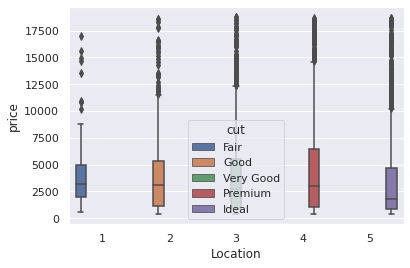

In [73]:
cdf = pd.concat([fair,good,verygood,premium,ideal])
cdf = cdf.drop(["clarity","carat","color","depth","table","x","y","z"], axis = 1)
df = sns.boxplot(x = "Location",y="price",hue = "cut", data = cdf)

Text(0, 0.5, 'price (US dollar)')

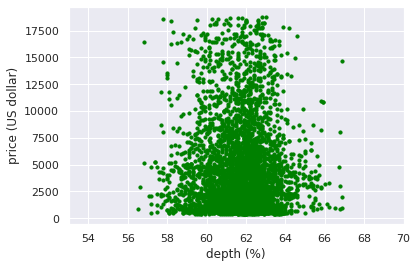

In [74]:
plt.scatter(diamonds_data.depth,diamonds_data.price,s=10,c='green')
plt.xlim(53, 70)
plt.xlabel("depth (%)")
plt.ylabel("price (US dollar)")

Text(0, 0.5, 'price (US dollar)')

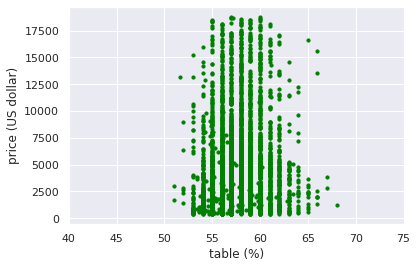

In [75]:
plt.scatter(diamonds_data.table,diamonds_data.price,s=10,c='green')
plt.xlim(40, 75)
plt.xlabel("table (%)")
plt.ylabel("price (US dollar)")

Text(0, 0.5, 'price (US dollar)')

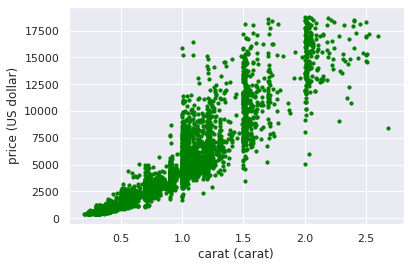

In [76]:
plt.scatter(diamonds_data.carat,diamonds_data.price,s=10,c='green')
plt.xlabel("carat (carat)")
plt.ylabel("price (US dollar)")

Text(0, 0.5, 'depth (%)')

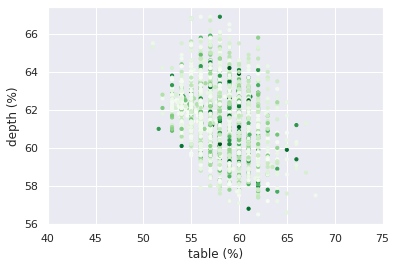

In [77]:
plt.scatter(diamonds_data.table,diamonds_data.depth,s=10,c=diamonds_data.price,cmap="Greens")
plt.xlim(40, 75)
plt.xlabel("table (%)")
plt.ylabel("depth (%)")

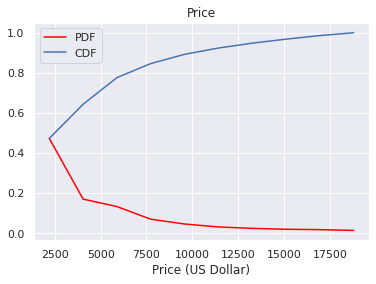

In [78]:
# Source https://www.geeksforgeeks.org/how-to-calculate-and-plot-a-cumulative-distribution-function-with-matplotlib-in-python/

count, bins_count = np.histogram(diamonds_data.price, bins=10)

pdf = count / sum(count)
cdf = np.cumsum(pdf)
plt.plot(bins_count[1:], pdf, color="red", label="PDF")
plt.plot(bins_count[1:], cdf, label="CDF")
plt.xlabel('Price (US Dollar)')
plt.title("Price")
plt.legend()

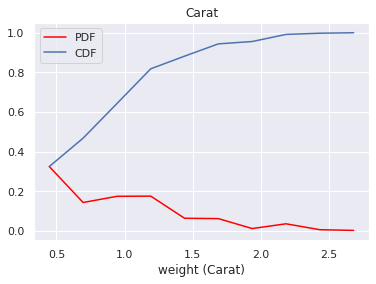

In [79]:
count, bins_count = np.histogram(diamonds_data.carat, bins=10)
pdf = count / sum(count)
cdf = np.cumsum(pdf)
plt.plot(bins_count[1:], pdf, color="red", label="PDF")
plt.plot(bins_count[1:], cdf, label="CDF")
plt.xlabel('weight (Carat)')
plt.title("Carat")
plt.legend()

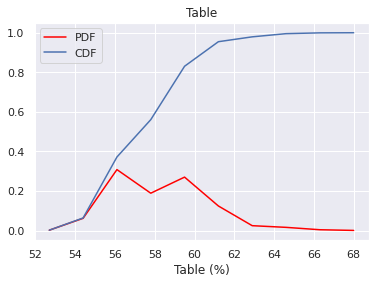

In [80]:
count, bins_count = np.histogram(diamonds_data.table, bins=10)
pdf = count / sum(count)
cdf = np.cumsum(pdf)
plt.plot(bins_count[1:], pdf, color="red", label="PDF")
plt.plot(bins_count[1:], cdf, label="CDF")
plt.xlabel('Table (%)')
plt.title("Table")
plt.legend()

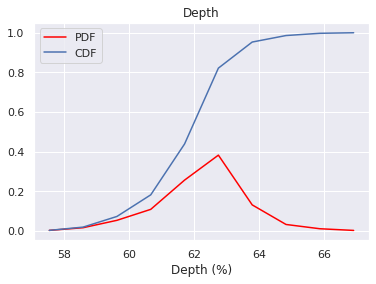

In [81]:
count, bins_count = np.histogram(diamonds_data.depth, bins=10)
pdf = count / sum(count)
cdf = np.cumsum(pdf)
plt.plot(bins_count[1:], pdf, color="red", label="PDF")
plt.plot(bins_count[1:], cdf, label="CDF")
plt.xlabel('Depth (%)')
plt.title("Depth")
plt.legend()

In [82]:
np.random.seed(791)

sample_size = 500


intervals = []
sample_means = []

for sample in range(50): 
    sample = np.random.choice(a= diamonds_data.price, size = sample_size)
    sample_mean = sample.mean()
    sample_means.append(sample_mean)

    z_critical = stats.norm.ppf(q = 0.95)  # Get the z-critical value*   
    #print("z-critical value:")              # Check the z-critical value
    #print(z_critical)       

    pop_stdev = diamonds_data.price.std()  # Get the population standard deviation

    stats.norm.ppf(q = 0.05)

    margin_of_error = z_critical * (pop_stdev/math.sqrt(sample_size))

    confidence_interval = (sample_mean - margin_of_error,
                           sample_mean + margin_of_error)  
   
    intervals.append(confidence_interval)

interval 90 %
(3778.231007388748, 4375.512992611251)


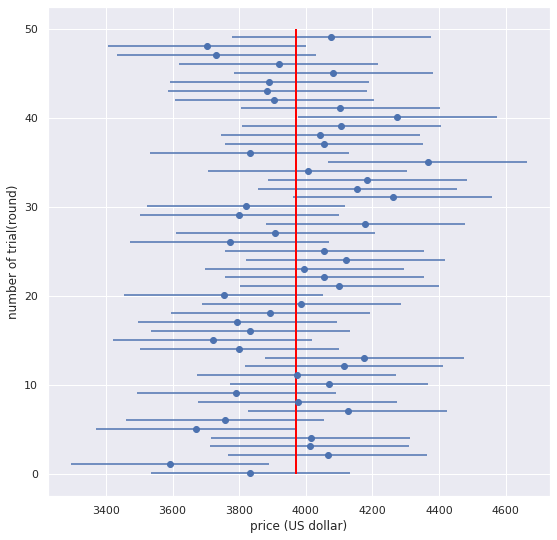

In [83]:
plt.figure(figsize=(9,9))

plt.errorbar(y=np.arange(0.1, 50, 1), 
             x=sample_means,
             xerr=[(top-bot)/2 for top,bot in intervals],
             fmt='o')

plt.vlines(ymin=0, ymax=50,
           x=diamonds_data.price.mean(), 
           linewidth=2.0,
           color="red");
plt.xlabel("price (US dollar)")
plt.ylabel("number of trial(round)")
print("interval 90 %")
print(confidence_interval)

In [84]:
np.random.seed(791)

sample_size = 500


intervals = []
sample_means = []

for sample in range(50): 
    sample = np.random.choice(a= diamonds_data.price, size = sample_size)
    sample_mean = sample.mean()
    sample_means.append(sample_mean)
    mean = sample.mean()
    std = sample.std()
    
    z_critical = stats.norm.ppf(q = 0.975)  
    #print("z-critical value:")              
    #print(z_critical)       

    pop_stdev = diamonds_data.price.std()  

    stats.norm.ppf(q = 0.025)

    margin_of_error = z_critical * (pop_stdev/math.sqrt(sample_size))

    confidence_interval = (sample_mean - margin_of_error,
                           sample_mean + margin_of_error)  
    
    intervals.append(confidence_interval)
# print(sample)
# print(mean)
# print(std)

interval 95 %
(3721.019308772895, 4432.724691227105)


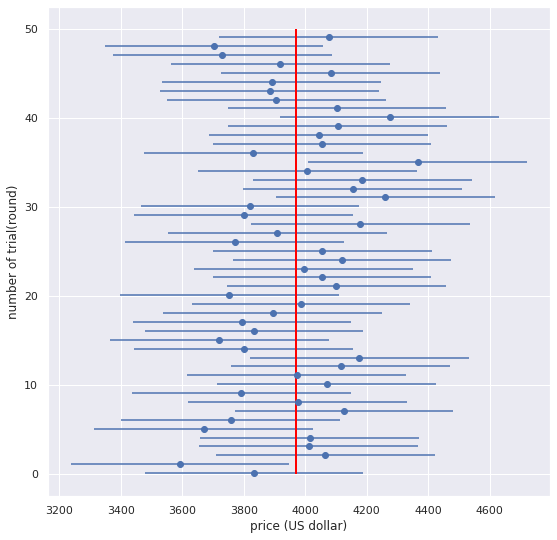

In [85]:
plt.figure(figsize=(9,9))

plt.errorbar(y=np.arange(0.1, 50, 1), 
             x=sample_means,
             xerr=[(top-bot)/2 for top,bot in intervals],
             fmt='o')

plt.vlines(ymin=0, ymax=50,
           x=diamonds_data.price.mean(), 
           linewidth=2.0,
           color="red");
plt.xlabel("price (US dollar)")
plt.ylabel("number of trial(round)")
print("interval 95 %")
print(confidence_interval)

In [86]:
np.random.seed(791)

sample_size = 500


intervals = []
sample_means = []

for sample in range(50): 
    sample = np.random.choice(a= diamonds_data.price, size = sample_size)
    sample_mean = sample.mean()
    sample_means.append(sample_mean)

    z_critical = stats.norm.ppf(q = 0.995)    
    #print("z-critical value:")              
    #print(z_critical)       

    pop_stdev = diamonds_data.price.std()  

    stats.norm.ppf(q = 0.005)

    margin_of_error = z_critical * (pop_stdev/math.sqrt(sample_size))
    
    confidence_interval = (sample_mean - margin_of_error,
                           sample_mean + margin_of_error)  
    intervals.append(confidence_interval)

interval 99 %
(3609.2022892095647, 4544.541710790435)


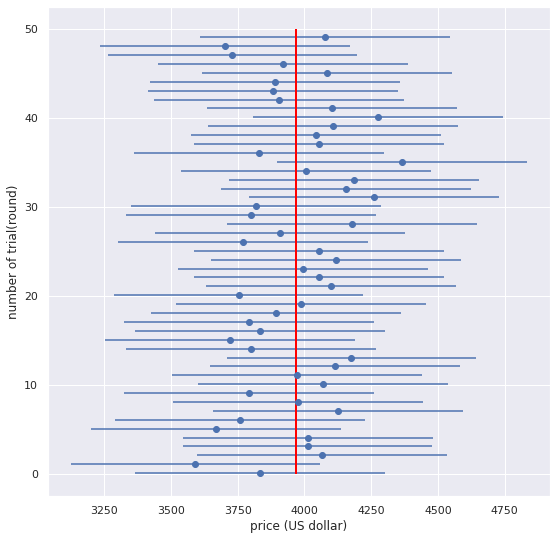

In [87]:
plt.figure(figsize=(9,9))

plt.errorbar(y=np.arange(0.1, 50, 1), 
             x=sample_means,
             xerr=[(top-bot)/2 for top,bot in intervals],
             fmt='o')

plt.vlines(ymin=0, ymax=50,
           x=diamonds_data.price.mean(), 
           linewidth=2.0,
           color="red");
plt.xlabel("price (US dollar)")
plt.ylabel("number of trial(round)")
print("interval 99 %")
print(confidence_interval)

In [88]:
diamonds_data.price

0       3832
1       4022
2       7006
3       1853
4       2462
        ... 
4995    1322
4996    1174
4997    1364
4998    4177
4999    1397
Name: price, Length: 4969, dtype: int64

In [89]:
data_dict = {}
data_dict['category'] = ['CL 0.9','CL 0.95','CL 0.99']
data_dict['lower'] = [3778.231007388748,3721.019308772895,3609.2022892095647]
data_dict['upper'] = [4375.512992611251,4432.724691227105,4544.541710790435]
dataset = pd.DataFrame(data_dict)


Text(0, 0.5, 'Confidence Level (CL)')

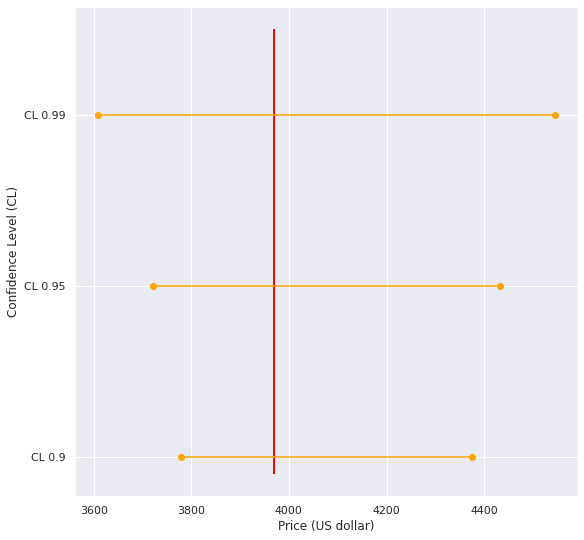

In [90]:
plt.figure(figsize=(9,9))
for lower,upper,y in zip(dataset['lower'],dataset['upper'],range(len(dataset))):
    plt.plot((lower,upper),(y,y),'ro-',color='orange')
plt.yticks(range(len(dataset)),list(dataset['category']))

plt.vlines(ymin=-0.1, ymax=2.5,
           x=diamonds_data.price.mean(), 
           linewidth=2.0,
           color="red");
plt.xlabel("Price (US dollar)")
plt.ylabel("Confidence Level (CL)")


-0.18716612455618684
72.45964136351402
0.09643358853172163


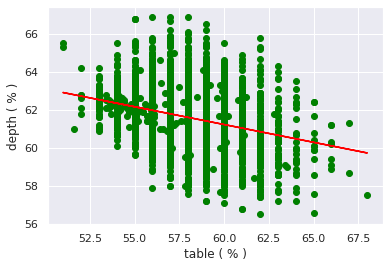

In [91]:
slope, intercept, r, p, std_err = stats.linregress(diamonds_data["table"], diamonds_data["depth"])

def myfunc(x):
  return slope * x + intercept
print(slope)
print(intercept)
print(r**2)
mymodel = list(map(myfunc, diamonds_data["table"]))

plt.scatter(diamonds_data["table"], diamonds_data["depth"],color="Green")
plt.plot(diamonds_data["table"], mymodel,color="red")
plt.xlabel("table ( % )")
plt.ylabel("depth ( % )")
plt.show()

7961.390965163185
-2382.2552432972166
0.8629819490804616


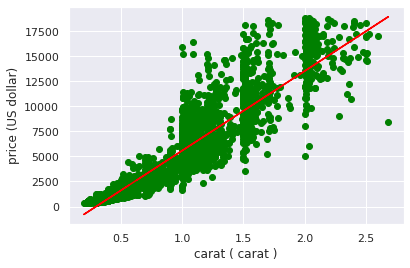

In [92]:
slope, intercept, r, p, std_err = stats.linregress(diamonds_data["carat"], diamonds_data["price"])

def myfunc(x):
  return slope * x + intercept
print(slope)
print(intercept)
print(r**2)
mymodel = list(map(myfunc, diamonds_data["carat"]))

plt.scatter(diamonds_data["carat"], diamonds_data["price"],color="Green")
plt.plot(diamonds_data["carat"], mymodel,color="red")
plt.xlabel("carat ( carat )")
plt.ylabel("price (US dollar)")
plt.show()

255.50221513476836
-10704.737036550912
0.019100154064368415


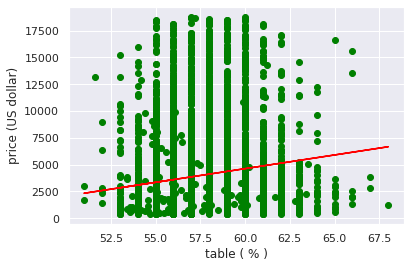

In [93]:
slope, intercept, r, p, std_err = stats.linregress(diamonds_data["table"], diamonds_data["price"])

def myfunc(x):
  return slope * x + intercept
print(slope)
print(intercept)
print(r**2)
mymodel = list(map(myfunc, diamonds_data["table"]))

plt.scatter(diamonds_data["table"], diamonds_data["price"],color="Green")
plt.plot(diamonds_data["table"], mymodel,color="red")
plt.xlabel("table ( % )")
plt.ylabel("price (US dollar)")
plt.show()

-31.964775760776224
5942.510159022213
0.00010859679868318064


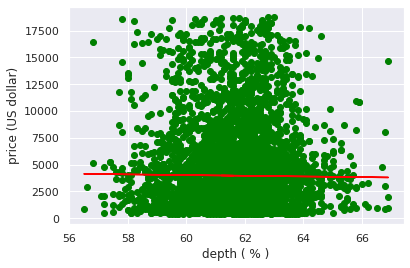

In [94]:
slope, intercept, r, p, std_err = stats.linregress(diamonds_data["depth"], diamonds_data["price"])

def myfunc(x):
  return slope * x + intercept
print(slope)
print(intercept)
print(r**2)
mymodel = list(map(myfunc, diamonds_data["depth"]))

plt.scatter(diamonds_data["depth"], diamonds_data["price"],color="Green")
plt.plot(diamonds_data["depth"], mymodel,color="red")
plt.xlabel("depth ( % )")
plt.ylabel("price (US dollar)")
plt.show()